# **IMDB Dataset of 50K Movie Reviews**

**Author** : SamiUllah568

**About Dataset**

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.


**Context**:

The IMDB dataset is widely used for sentiment analysis, particularly in the field of Natural Language Processing (NLP). It contains 50,000 movie reviews labeled as positive or negative. The dataset offers a substantial amount of data, allowing for more accurate and robust sentiment classification models compared to smaller datasets used in earlier benchmarks. It is typically used for binary classification tasks, where the objective is to classify each review as either positive or negative.

**Aim**:

The primary aim of this project is to predict the sentiment of movie reviews using classification algorithms****


**Specifically, the goal is to**

1.  Preprocess the text data (such as tokenization, removing stop words, stemming, etc.).
  
2.  Train a model to classify movie reviews as positive or negative.

3. Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score


4. Experiment with different algorithms like traditional machine learning models (e.g., Logistic Regression, Random Forest)

**Importing Required Libraries**

In [15]:
# !pip install wordcloud
# !pip install nltk
# !pip install spacy
# nltk.download('stopwords')

In [2]:
import os
import json
import re
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from wordcloud import WordCloud
# NLP (Natural Language Processing) libraries
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec

# Deep Learning libraries (for building models)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional


import warnings
warnings.filterwarnings('ignore')


# **Load DataSet**

* **Load Data directly through using kaggle API because of data set is little huge which take a long time on google colab**

In [3]:
# Load Kaggle API Key
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [4]:
# !pip install kaggle  # Install Kaggle API
!mkdir -p ~/.kaggle  # Create Kaggle directory
!mv kaggle.json ~/.kaggle/  # Copy your Kaggle API key (Upload kaggle.json first)
!chmod 600 ~/.kaggle/kaggle.json # Set file permissions

In [5]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 31% 8.00M/25.7M [00:00<00:00, 71.9MB/s]
100% 25.7M/25.7M [00:00<00:00, 154MB/s] 


**Unzip dataset**

In [6]:
from zipfile import ZipFile
with ZipFile("/content/imdb-dataset-of-50k-movie-reviews.zip", 'r') as zip_ref:
    zip_ref.extractall()
    print("Dataset extracted successfully!")

Dataset extracted successfully!


In [7]:
movies = pd.read_csv("/content/IMDB Dataset.csv")
# Size of Dataset
movies.shape

(50000, 2)

**Show Top 5 Rows**

In [8]:
movies.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Data Analysis**

**Check Missing Values**
* No Missing are Value pesent

In [9]:
# Missing Values Check
movies.isnull().sum()

,0
review,0
sentiment,0


**Handling Duplicated Values**

In [10]:
print("Before Drop duplicated values Size of Data Set -->> ",movies.shape)
print("Duplicated values -->> ",movies.duplicated().sum())
movies.drop_duplicates(inplace=True)
print("Drop Duplicates Successfully")
print("After Drop duplicated values Size of Data Set -->> ",movies.shape)
print("Duplicated Values --->> ",movies.duplicated().sum())

Before Drop duplicated values Size of Data Set -->>  (50000, 2)
Duplicated values -->>  418
Drop Duplicates Successfully
After Drop duplicated values Size of Data Set -->>  (49582, 2)
Duplicated Values --->>  0


**Sentiment Distribution Analysis**

*  The dataset exhibits a balanced distribution of sentiments.

In [11]:
movies["sentiment"].value_counts()

,count
sentiment,
positive,24884
negative,24698


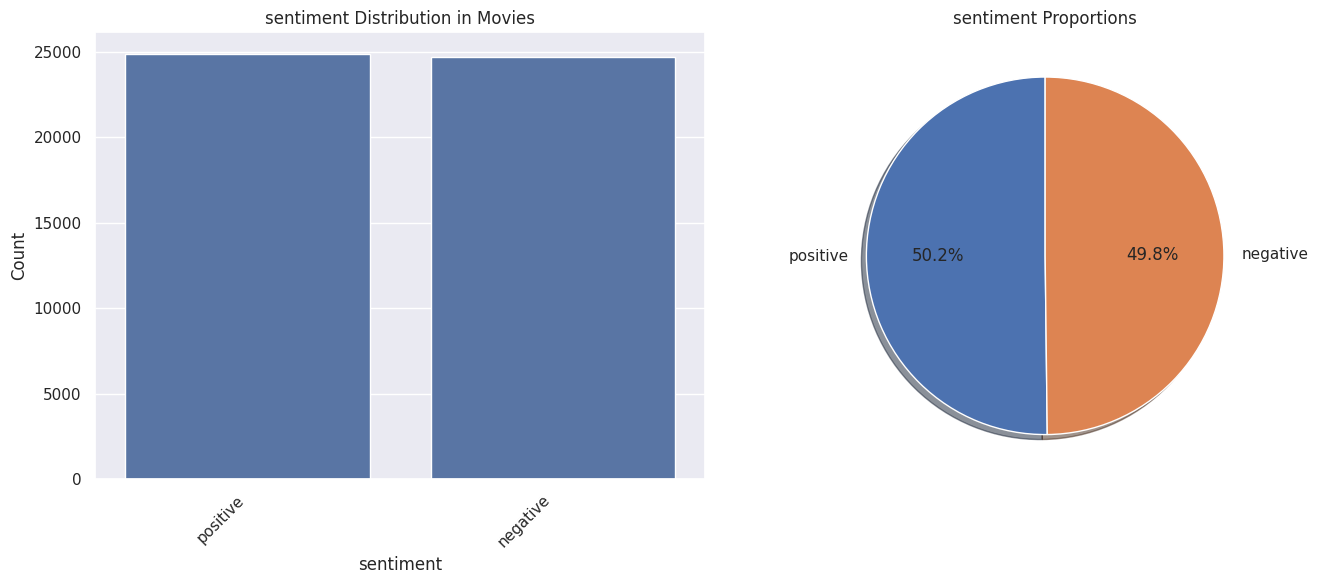

In [12]:
# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for sentiment
sns.countplot(data=movies, x="sentiment", ax=ax[0])
ax[0].set_title("sentiment Distribution in Movies")
ax[0].set_xlabel("sentiment")
ax[0].set_ylabel("Count")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Pie chart for sentiment value counts
sentiment_counts = movies["sentiment"].value_counts()
ax[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title("sentiment Proportions")

# Display the plot
plt.tight_layout()
plt.show()


# **Text Preprocessing**

1. **Removing html Tags**
2. **puncuation Removing**
3. **Lower Case**
4. **Tokenize(Spacy)**
5. **Stopwords Removing**
6. **Stemming**


In [16]:
# Load default stopwords
stop_words = set(stopwords.words("english"))

# Remove sentiment-related words from the stopword list
sentiment_words = {"good", "bad", "great", "awesome", "terrible", "horrible", "fantastic", "amazing", "awful", "love", "hate"}
stop_words = stop_words - sentiment_words  # Remove these words from stopwords


# Initialize stemmer and stopwords
stemming = PorterStemmer()
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    text = re.sub(r'<.*?>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[.,!?]', '', text)  # Remove punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets and spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.lower().strip()  # Convert to lowercase and strip spaces

    # Process the text with spaCy
    doc = nlp(text)

    # Tokenize, remove stopwords, and perform Stemming
    cleaned_text = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return ' '.join(cleaned_text)  # Join words back into a string

# Apply function on Review Column
movies["clean_text"] = movies["review"].apply(clean_text)

In [ ]:
# # Initialize stemmer and stopwords
# stemming = PorterStemmer()
# stop_words = set(stopwords.words('english'))

# # Load the spaCy model
# nlp = spacy.load('en_core_web_sm')

# def clean_text(text):
#     text = re.sub(r'<.*?>', ' ', text)  # Remove HTML tags
#     text = re.sub(r'[.,!?]', '', text)  # Remove punctuation
#     text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets and spaces
#     text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
#     text = text.lower().strip()  # Convert to lowercase and strip spaces

#     # Process the text with spaCy
#     doc = nlp(text)

#     # Tokenize, remove stopwords, and perform Stemming
#     cleaned_text = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

#     return ' '.join(cleaned_text)  # Join words back into a string

# # Apply function on Review Column
# movies["clean_text"] = movies["review"].apply(clean_text)


**Displaying Text Before and After Preprocessing**

In [17]:
movies.reset_index(inplace=True)
print("============Before Peprocessing============\n")
print(movies["review"][0])
print("\n============After Peprocessing============\n")
print(movies["clean_text"][0])

============Before Peprocessing============

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say 

# **Visualizing Sentiment-Based Word Clouds**
**Generating Word Clouds for Positive and Negative Reviews**
*  Separates reviews based on sentiment.
*  Combines text for each sentiment category.
*  Generates and plots word clouds for positive and negative sentiment.

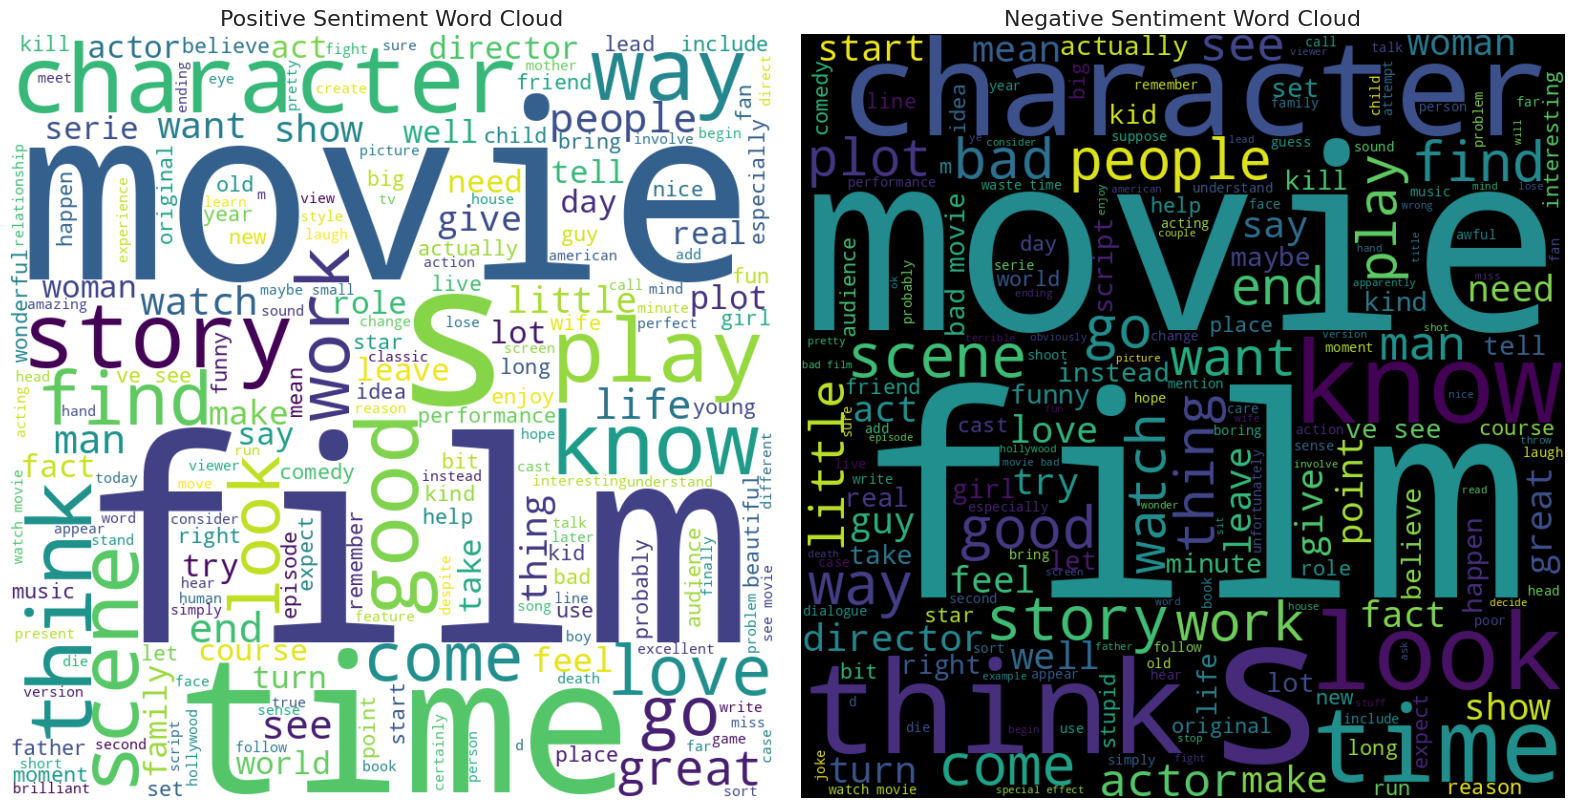

In [18]:
# Separate positive and negative reviews
pos_reviews = movies[movies["sentiment"] == 'positive']["clean_text"]
neg_reviews = movies[movies["sentiment"] == 'negative']["clean_text"]

# Combine all text for each sentiment
pos_text = ' '.join(pos_reviews)
neg_text = ' '.join(neg_reviews)

# Generate word clouds
wordcloud_pos = WordCloud(
    height=800, width=800, background_color='white', max_words=200
).generate(pos_text)

wordcloud_neg = WordCloud(
    height=800, width=800, background_color='black', max_words=200
).generate(neg_text)

# Plot both word clouds
plt.figure(figsize=(16, 8))

# Positive Sentiment
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Sentiment Word Cloud", fontsize=16)
plt.axis("off")

# Negative Sentiment
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Sentiment Word Cloud", fontsize=16)
plt.axis("off")

plt.tight_layout()
plt.show()

**Defining Features and Target for Sentiment Analysis**

In [19]:
X = movies["clean_text"]
y = movies["sentiment"].to_numpy()
print(f"Unique Labels: {np.unique(y)}")

Unique Labels: ['negative' 'positive']


# **Text Preprocessing and Embedding Preparation for Sentiment Analysis**

1. **Text Tokenization and Sequence Preparation for NLP Model**
2. **Padding Sequences for Uniform Input Length**
3. **Label Encoding and Dataset Splitting for Model Training**
4. **Word2Vec**


  *  **Training a Word2Vec Model for Word Embeddings**
  *   **Creating an Embedding Matrix from Trained Word2Vec Model**



**1 --->> Text Tokenization and Sequence Preparation for NLP Model**

In [20]:
# Initialize the tokenizer with OOV token and vocabulary size limit
tokenizer = Tokenizer(oov_token="<OOV>", num_words=120000)

# Fit tokenizer on the text data
tokenizer.fit_on_texts(X)

# Define vocabulary size
voc_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {voc_size}")

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(X)

print(f"\nMaximum sequence length: {max(len(seq) for seq in sequences)}")
print(f"Minimum sequence length: {min(len(seq) for seq in sequences)}")

# Print the first sequence for reference
print(f"First sequence length: {len(sequences[0])}")
print(f"First sequence: {sequences[0]}")


Vocabulary Size: 144169

Maximum sequence length: 1307
Minimum sequence length: 3
First sequence length: 145
First sequence: [891, 260, 10, 2656, 126, 237, 1473, 80, 428, 77, 25, 962, 2656, 4310, 11847, 15, 401, 82, 80, 205, 1164, 4885, 4854, 9167, 462, 1513, 1356, 516, 238, 401, 2743, 174, 137, 205, 208, 2656, 6241, 40, 11848, 5396, 2019, 497, 45220, 475, 1092, 18376, 346, 3776, 1718, 879, 1703, 1583, 8570, 156, 20830, 13098, 139, 3517, 2877, 346, 197, 60176, 19918, 45221, 12823, 5166, 780, 1986, 14081, 17134, 159, 1851, 5954, 9298, 6755, 6445, 104, 110, 138, 734, 74, 20, 47, 4, 1564, 308, 75, 195, 1177, 1996, 116, 308, 888, 308, 60177, 4, 590, 126, 13, 962, 1198, 1778, 4, 1236, 10, 549, 805, 2656, 24, 9948, 139, 368, 1079, 401, 401, 5040, 3608, 1517, 237, 778, 20831, 4252, 237, 79, 364, 110, 8456, 560, 517, 4252, 72, 879, 4052, 209, 487, 994, 879, 265, 10, 2656, 3004, 2678, 60178, 444, 273]


**2 --->> Padding Sequences for Uniform Input Length**

In [22]:
# Define maximum sequence length
max_length = 1307

# Apply padding to sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# Print the shape of the padded sequences
print(f"Padded Sequence Shape: {padded_sequences.shape}")

# Print the first padded sequence
print(f"First Padded Sequence:\n{padded_sequences[0]}")


Padded Sequence Shape: (49582, 1000)
First Padded Sequence:
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0    

**3 -->> Label Encoding and Dataset Splitting for Model Training**

In [23]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Print shapes
print(f"Training Data Shape: {x_train.shape}")
print(f"Testing Data Shape: {x_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

# Encode labels
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)


Training Data Shape: (39665, 1000)
Testing Data Shape: (9917, 1000)
Training Labels Shape: (39665,)
Testing Labels Shape: (9917,)


# **--->> Word2Vec**

* **Training a Word2Vec Model for Word Embeddings**
* **Creating an Embedding Matrix from trained Word2Vec Model**

In [24]:
sentences = [sentence.split() for sentence in X]
w2v_model = Word2Vec(sentences, window=7, vector_size=200, min_count=1, sg=0)
print(len(w2v_model.wv[0]))

embedding_matrix = np.zeros((voc_size, 200))
for word, i in tokenizer.word_index.items():
    if i < voc_size:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]



300


# **Model Trainning**
*  **Building and Compiling a Bidirectional LSTM Model for Sentiment Analysis**

In [25]:
embedding = Embedding(input_dim=voc_size , output_dim=200,weights=[embedding_matrix],input_length=max_length,trainable=True)

# Define your model
model = Sequential()

model.add(embedding)

# LSTM layers with dropout
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.50))

model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.40))

# Dense layers with dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.20))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Explicitly build the model
model.build(input_shape=(None, max_length))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=["accuracy"])

# Show the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 1000, 300)           │      43,250,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1000, 256)           │         439,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,859,021 (167.31 MB)

 Trainable params: 43,859,021 (167.31 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training with Early Stopping for Optimization**

In [26]:
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    min_delta=0.001,          # Minimum change to qualify as an improvement
    patience=5,           # Stop training after 5 epochs without improvement
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

history = model.fit(x_train,y_train,validation_split=0.25, epochs=50,batch_size=25, callbacks=[earlystopping])

Epoch 1/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 215s 174ms/step - accuracy: 0.5443 - loss: 0.6849 - val_accuracy: 0.7653 - val_loss: 0.5712
Epoch 2/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 261s 175ms/step - accuracy: 0.7582 - loss: 0.5427 - val_accuracy: 0.8298 - val_loss: 0.4063
Epoch 3/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 209s 175ms/step - accuracy: 0.8344 - loss: 0.4286 - val_accuracy: 0.8356 - val_loss: 0.3877
Epoch 4/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 262s 176ms/step - accuracy: 0.8476 - loss: 0.3930 - val_accuracy: 0.8558 - val_loss: 0.3458
Epoch 5/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 261s 175ms/step - accuracy: 0.8562 - loss: 0.3738 - val_accuracy: 0.8634 - val_loss: 0.3369
Epoch 6/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 262s 175ms/step - accuracy: 0.8637 - loss: 0.3563 - val_accuracy: 0.8618 - val_loss: 0.3463
Epoch 7/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 263s 176ms/step - accuracy: 0.8663 - loss: 0.3529 - val_accuracy: 0.8678 - val_loss: 0.3269
Epoch 8/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 209s 175ms/step - ac

* **Plotting Model Accuracy Over Epochs**

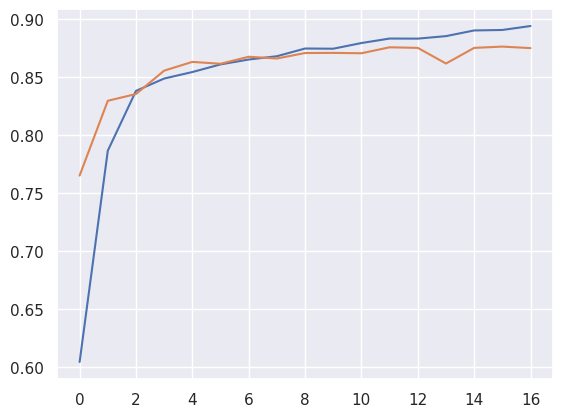

In [27]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

* **Plotting Model Loss Over Epochs**

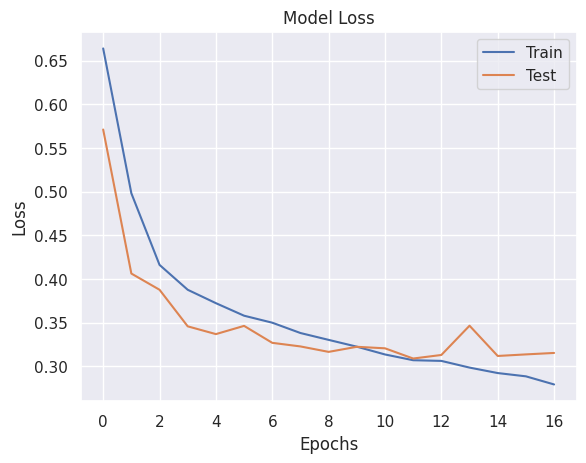

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Test"])
plt.show()

**Model Evaluation and Performance Metrics**

In [54]:
# Get model predictions (probabilities)
pred_probs_train = model.predict(x_train)
pred_probs_test = model.predict(x_test)

# Convert probabilities to class labels (for binary classification)
pred_train = (pred_probs_train > 0.55).astype(int)
pred_test = (pred_probs_test > 0.55).astype(int)

# Evaluate performance on training data
print("Training Accuracy:", accuracy_score(y_train, pred_train))
print("Training Classification Report:\n", classification_report(y_train, pred_train))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, pred_train))

# Evaluate performance on test data
print("Test Accuracy:", accuracy_score(y_test, pred_test))
print("Test Classification Report:\n", classification_report(y_test, pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, pred_test))


1240/1240 ━━━━━━━━━━━━━━━━━━━━ 67s 54ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step
Training Accuracy: 0.8891718139417623
Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     19759
           1       0.89      0.88      0.89     19906

    accuracy                           0.89     39665
   macro avg       0.89      0.89      0.89     39665
weighted avg       0.89      0.89      0.89     39665

Training Confusion Matrix:
 [[17671  2088]
 [ 2308 17598]]
Test Accuracy: 0.8703236865987698
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4939
           1       0.87      0.87      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917

Test Confusion Matrix:
 [[4291  648]
 [ 638 4340]]


# **Model Saving**

In [30]:
import pickle
from gensim.models import Word2Vec
from tensorflow import keras  # Make sure you're using TensorFlow ≥2.16

# Save label encoder
with open("encode.pkl", 'wb') as file1:
    pickle.dump(encode, file1)

# Save tokenizer
with open("tokenizer.pkl", 'wb') as file2:
    pickle.dump(tokenizer, file2)

# Save Word2Vec model
w2v_model.save("Word2vModel.model")

# Save model
model.save("bilstm_model.keras")

In [31]:
# Load encoder
with open("encode.pkl", 'rb') as f:
    encode = pickle.load(f)

# Load tokenizer
with open("tokenizer.pkl", 'rb') as f:
    tokenizer = pickle.load(f)

# Load Word2Vec model
w2v_model = Word2Vec.load("Word2vModel.model")

# Load Keras model
model = keras.models.load_model("bilstm_model.keras")

In [78]:
def prediction(review):
    try:
        review = clean_text(review)
        if not review:
            return "Neutral"

        seq = tokenizer.texts_to_sequences([review])
        print(f"Tokenized Sequence: {seq}")  # Debugging

        if not seq or not seq[0]:
            return "Neutral"

        padded = pad_sequences(seq, maxlen=max_length, padding='post')
        # print(f"Padded Sequence: {padded}")  # Debugging

        prob = model.predict(padded)
        print(f"Prediction Probability: {prob}")  # Debugging

        return "Positive" if prob > 0.55 else "Negative"

    except Exception as e:
        print(f"Prediction error: {str(e)}")
        return "Neutral"


In [79]:
text = " This is vey good movie and very interesting moie i like it"
prediction(text)

Tokenized Sequence: [[20935, 6, 2, 95, 1, 5]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction Probability: [[0.58814865]]


'Positive'

In [80]:
text = "Despite the visually stunning cinematography and a few decent performances, the movie ultimately falls flat due to its predictable plot, poorly developed characters, and an over-reliance on clichés, making it a tedious and uninspired experience that fails to leave any lasting impact."
prediction(text)

Tokenized Sequence: [[303, 1672, 1179, 441, 376, 51, 2, 860, 127, 794, 520, 32, 653, 549, 9, 23518, 1107, 35, 1763, 2605, 265, 288, 59, 11928, 1139]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction Probability: [[0.5267689]]


'Negative'

In [81]:
text = " This is  bad movie and very bad moie i like it"
prediction(text)

Tokenized Sequence: [[11, 2, 11, 1, 5]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction Probability: [[0.54068565]]


'Negative'